<a href="https://colab.research.google.com/github/amankharwal/Website-data/blob/master/Best_Streaming_Service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tv_shows.csv to tv_shows.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
tv_shows.describe()

,Unnamed: 0,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2805.000000,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,1619.900511,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,0.000000,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1402.500000,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2805.000000,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4207.500000,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,5610.000000,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [6]:
tv_shows.drop_duplicates(subset='Title',keep='first',inplace=True)

In [7]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb']*10
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [8]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+','Prime Video']],id_vars=['Title'],var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [9]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')

In [10]:
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix','Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

In [11]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]

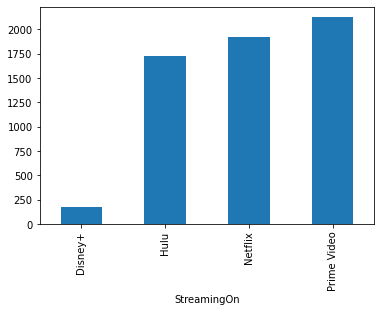

In [12]:
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [13]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [14]:
px.scatter(tv_shows_both_ratings, x='IMDb',y='Rotten Tomatoes',color='StreamingOn')